<a href="https://colab.research.google.com/github/henisnpatel/AI-Omega-Project/blob/main/Omega_Project_Lung_Cancer_Dataset_Cleaning_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Basic Statistical & Distribution Analysis
Average, minimum, and maximum age

-  Gender distribution

- Severity level distribution

2. Lifestyle Impact Analysis
- Average pollution exposure per severity level

- Average alcohol use per severity level

- Occupational hazards vs. chronic lung disease correlation

- Balanced diet analysis by severity level

3. Symptom Frequency & Progression Analysis
- Most common symptoms among Level 3 cases

- Gender-based symptom comparison

- Most correlated symptom with severe cases

- Hidden patterns in rare symptoms (e.g., clubbing of nails and shortness of breath relationship)

- Symptom escalation trends (which symptoms appear first before a patient worsens)

5. Severity Level & Lifestyle Influence
Compare severity levels across different age groups (0-19, 20-39, 40-59, 60+)

- Diet impact on symptom severity (compare severity levels of patients with a balanced vs. unbalanced diet)

- Alcohol use correlation with symptoms (does high alcohol use increase specific symptoms?)

6. Advanced Symptom Correlation & Prediction
- Probability of other symptoms appearing given a specific symptom (e.g., if someone has fatigue, how likely are they to also have weight loss?)

- Symptom correlation by severity level (ensuring severity levels don’t mix in analysis)

- Finding the best symptom predictors of severe disease (which symptom combinations most accurately predict Level 3 cases?)

7. Gender & Age-Based Risk Factor Analysis
- How different risk factors (pollution, genetic risk, occupational hazards) vary by gender

- How age affects disease progression (do younger patients experience milder or different symptoms than older ones?)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [ ]:
# Step 1: Upload the file manually
uploaded = files.upload()

# Step 2: Load the dataset (assuming it's a CSV file)
filename = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(filename)

# Step 3: Clean the data
# Remove 'P' from Patient Id
df["Patient Id"] = df["Patient Id"].str.replace("P", "").astype(int)

# Convert 'Level' to numeric values
df["Level"] = df["Level"].map({"Low": 1, "Medium": 2, "High": 3})

# Step 4: Save the cleaned data (optional)
df.to_csv("cleaned_data.csv", index=False)

Saving cancer patient data sets.csv to cancer patient data sets.csv


In [ ]:
df = pd.read_csv("cleaned_data.csv", index_col="index")
df.head(10)


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
5,102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
6,103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
7,104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,1
8,105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,2


In [ ]:
print(df.describe())

        Patient Id          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    500.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       1.000000    14.000000     1.000000         1.0000     1.000000   
25%     250.750000    27.750000     1.000000         2.0000     2.000000   
50%     500.500000    36.000000     1.000000         3.0000     5.000000   
75%     750.250000    45.000000     2.000000         6.0000     7.000000   
max    1000.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.8

In [ ]:
# Download cleaned dataset
df.to_csv("cleaned_lung_cancer_data.csv", index=False)
files.download("cleaned_lung_cancer_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Average Age: 37.174
Minimum Age: 14
Maximum Age: 73


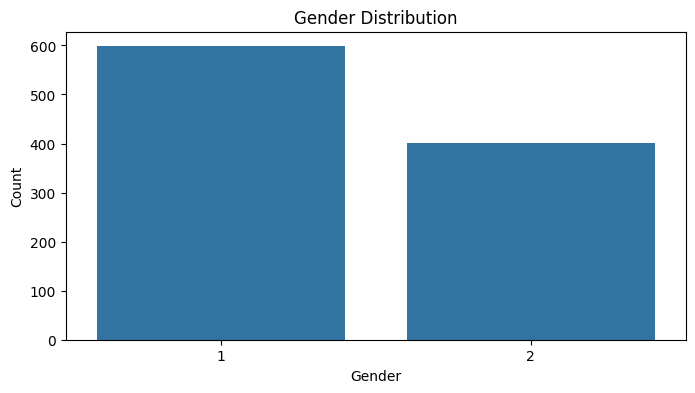

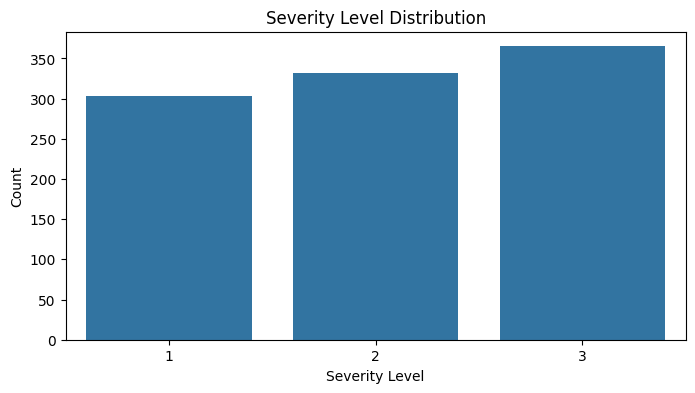


Average Air Pollution Exposure per Severity Level:
   Level  Air Pollution
0      1       2.600660
1      2       2.933735
2      3       5.693151

Average Alcohol Use per Severity Level:
   Level  Alcohol use
0      1     2.231023
1      2     4.198795
2      3     6.830137

Correlation between Occupational Hazards and Chronic Lung Disease: 0.8582838533909174


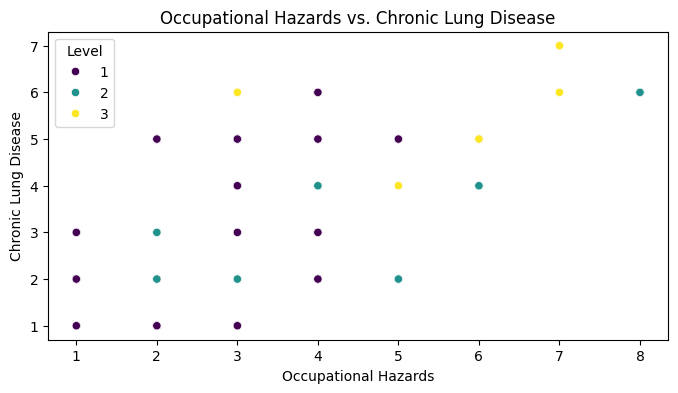


Average Balanced Diet Score per Severity Level:
   Level  Balanced Diet
0      1       3.000000
1      2       3.512048
2      3       6.619178


In [ ]:
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

# -----------------------------
# 1. Basic Statistical & Distribution Analysis
# -----------------------------

# Average, minimum, and maximum age
avg_age = df["Age"].mean()
min_age = df["Age"].min()
max_age = df["Age"].max()
print("Average Age:", avg_age)
print("Minimum Age:", min_age)
print("Maximum Age:", max_age)

# Gender distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Severity level distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Level")
plt.title("Severity Level Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 2. Risk Factor & Lifestyle Impact Analysis
# -----------------------------

# Average pollution exposure per severity level
avg_pollution = df.groupby("Level")["Air Pollution"].mean().reset_index()
print("\nAverage Air Pollution Exposure per Severity Level:")
print(avg_pollution)

# Average alcohol use per severity level
avg_alcohol = df.groupby("Level")["Alcohol use"].mean().reset_index()
print("\nAverage Alcohol Use per Severity Level:")
print(avg_alcohol)

# Occupational hazards vs. chronic lung disease correlation
# Calculate the correlation coefficient
corr_value = df["OccuPational Hazards"].corr(df["chronic Lung Disease"])
print("\nCorrelation between Occupational Hazards and Chronic Lung Disease:", corr_value)

# Visualize the relationship
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="OccuPational Hazards", y="chronic Lung Disease", hue="Level", palette="viridis")
plt.title("Occupational Hazards vs. Chronic Lung Disease")
plt.xlabel("Occupational Hazards")
plt.ylabel("Chronic Lung Disease")
plt.show()

# Balanced diet analysis by severity level
avg_balanced_diet = df.groupby("Level")["Balanced Diet"].mean().reset_index()
print("\nAverage Balanced Diet Score per Severity Level:")
print(avg_balanced_diet)


Most common symptoms among Level 3 cases (by average severity):
Fatigue                     5.589041
Shortness of Breath         5.328767
Dry Cough                   4.775342
Weight Loss                 4.468493
Frequent Cold               4.380822
Clubbing of Finger Nails    4.208219
Swallowing Difficulty       4.189041
Wheezing                    3.884932
Snoring                     3.227397
dtype: float64


<ipython-input-6-a6eeaefc0cc7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_means_level3.index, y=symptom_means_level3.values, palette="magma")


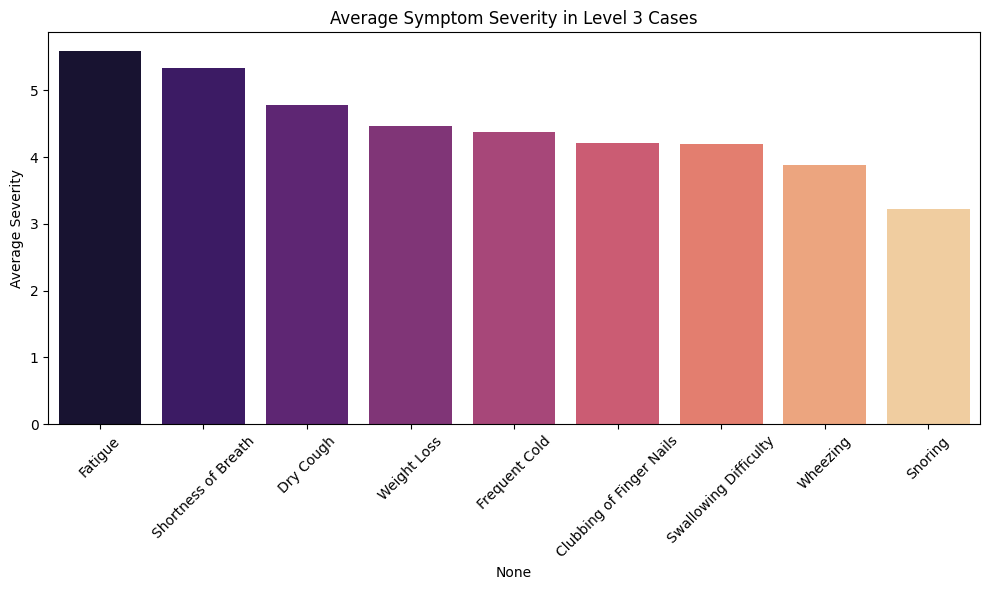


Gender-based symptom comparison (average scores):
         Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
Gender                                                         
1       4.070234     3.959866             4.326087  3.904682   
2       3.537313     3.699005             4.111940  3.587065   

        Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
Gender                                                                   
1                    3.854515                  3.989967       3.536789   
2                    3.584577                  3.823383       3.534826   

        Dry Cough   Snoring  
Gender                       
1        4.058528  3.145485  
2        3.547264  2.599502  


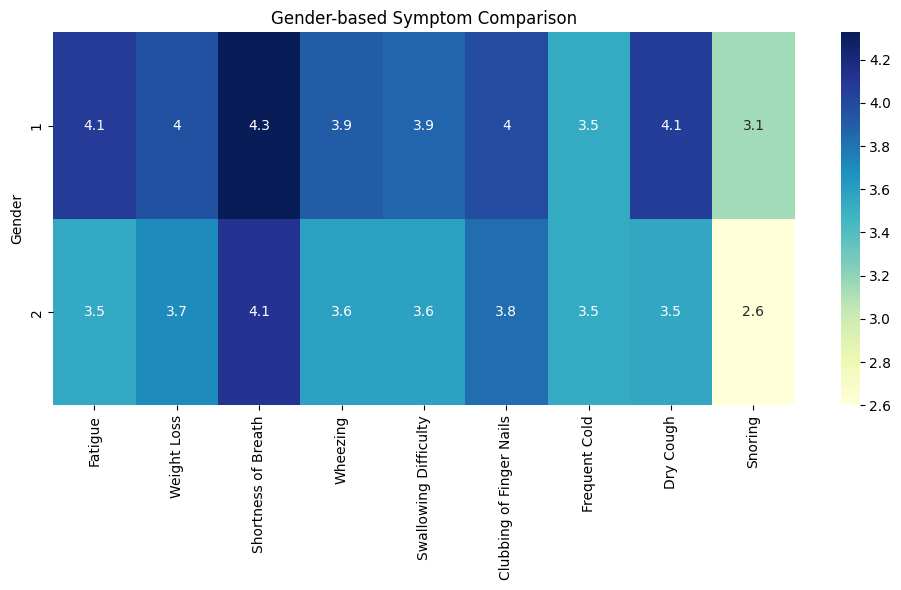


Symptom most correlated with severity (Level): Fatigue
Correlation coefficient: 0.6251136281446786

Correlation between Clubbing of Finger Nails and Shortness of Breath: 0.47427466239202504


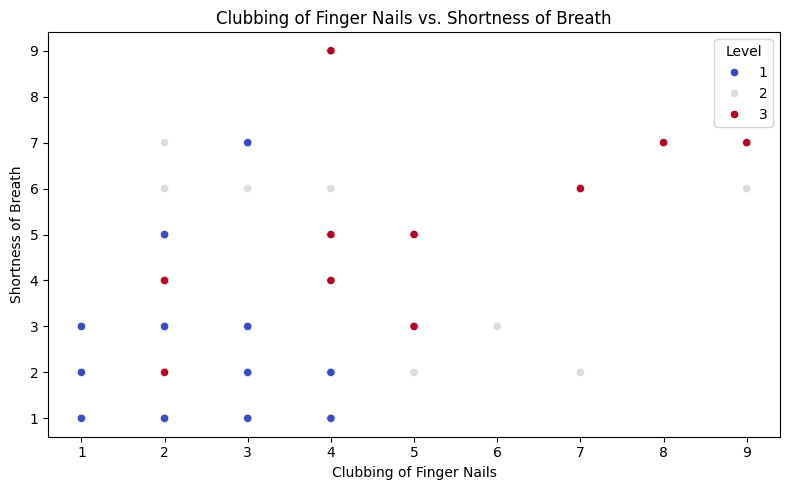


Symptom escalation trends (average severity by Level):
        Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
Level                                                         
1      2.171617     2.501650             2.498350  2.574257   
2      3.487952     4.415663             4.632530  4.756024   
3      5.589041     4.468493             5.328767  3.884932   

       Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
Level                                                                   
1                   2.759076                  2.468647       2.366337   
2                   4.159639                  4.936747       3.674699   
3                   4.189041                  4.208219       4.380822   

       Dry Cough   Snoring  
Level                       
1       2.914191  2.141914  
2       3.695783  3.310241  
3       4.775342  3.227397  


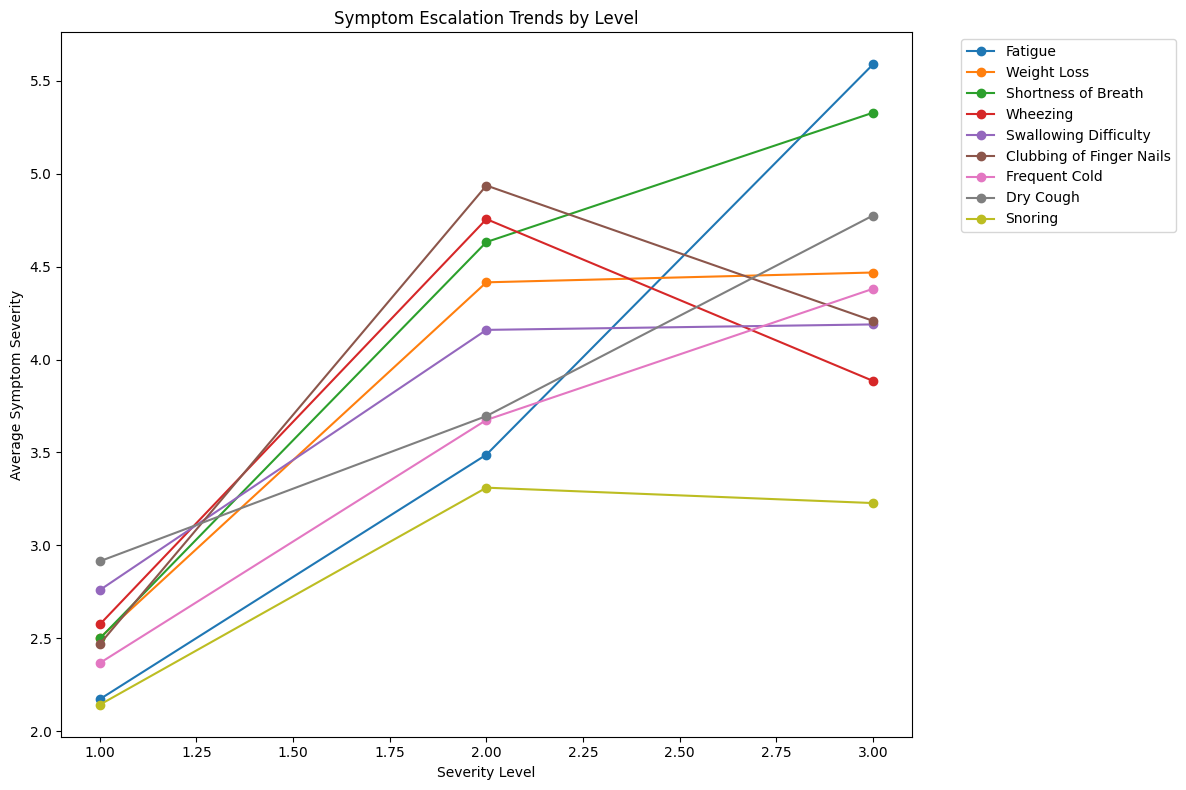

In [ ]:
# ========================================================
# Section 3: Symptom Frequency & Progression Analysis
# ========================================================

# Define the list of symptom columns (adjust if your dataset has more/other symptoms)
symptom_cols = ["Fatigue", "Weight Loss", "Shortness of Breath", "Wheezing",
                "Swallowing Difficulty", "Clubbing of Finger Nails", "Frequent Cold",
                "Dry Cough", "Snoring"]

## 3.1 Most common symptoms among Level 3 cases (High severity)
df_level3 = df[df["Level"] == 3]
# Here we use the average severity as a proxy for commonality
symptom_means_level3 = df_level3[symptom_cols].mean().sort_values(ascending=False)
print("Most common symptoms among Level 3 cases (by average severity):")
print(symptom_means_level3)

plt.figure(figsize=(10,6))
sns.barplot(x=symptom_means_level3.index, y=symptom_means_level3.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Average Symptom Severity in Level 3 Cases")
plt.ylabel("Average Severity")
plt.tight_layout()
plt.show()

## 3.2 Gender-based symptom comparison
gender_symptom_means = df.groupby("Gender")[symptom_cols].mean()
print("\nGender-based symptom comparison (average scores):")
print(gender_symptom_means)

plt.figure(figsize=(10,6))
sns.heatmap(gender_symptom_means, annot=True, cmap="YlGnBu")
plt.title("Gender-based Symptom Comparison")
plt.tight_layout()
plt.show()

## 3.3 Most correlated symptom with severe cases
# We calculate the correlation of each symptom with the overall 'Level'
symptom_correlations = {}
for col in symptom_cols:
    corr = df[col].corr(df["Level"])
    symptom_correlations[col] = corr

# Identify the symptom with the strongest (absolute) correlation
most_corr_symptom = max(symptom_correlations, key=lambda k: abs(symptom_correlations[k]))
print("\nSymptom most correlated with severity (Level):", most_corr_symptom)
print("Correlation coefficient:", symptom_correlations[most_corr_symptom])

## 3.4 Hidden patterns in rare symptoms: Clubbing of Finger Nails vs. Shortness of Breath
corr_club_spo2 = df["Clubbing of Finger Nails"].corr(df["Shortness of Breath"])
print("\nCorrelation between Clubbing of Finger Nails and Shortness of Breath:", corr_club_spo2)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Clubbing of Finger Nails", y="Shortness of Breath", hue="Level", palette="coolwarm")
plt.title("Clubbing of Finger Nails vs. Shortness of Breath")
plt.tight_layout()
plt.show()

## 3.5 Symptom escalation trends
# Compute the mean severity for each symptom across the different Levels
escalation_trends = df.groupby("Level")[symptom_cols].mean()
print("\nSymptom escalation trends (average severity by Level):")
print(escalation_trends)

plt.figure(figsize=(12,8))
for col in symptom_cols:
    plt.plot(escalation_trends.index, escalation_trends[col], marker='o', label=col)
plt.title("Symptom Escalation Trends by Level")
plt.xlabel("Severity Level")
plt.ylabel("Average Symptom Severity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Severity Level Summary by Diet Group:
            count      mean       std  min  25%  50%  75%  max
Diet Group                                                    
Balanced    556.0  2.492806  0.760478  1.0  2.0  3.0  3.0  3.0
Unbalanced  444.0  1.522523  0.500056  1.0  1.0  2.0  2.0  2.0


<ipython-input-32-bcff415c6ff1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diet Group", y="Level", palette="Set3")


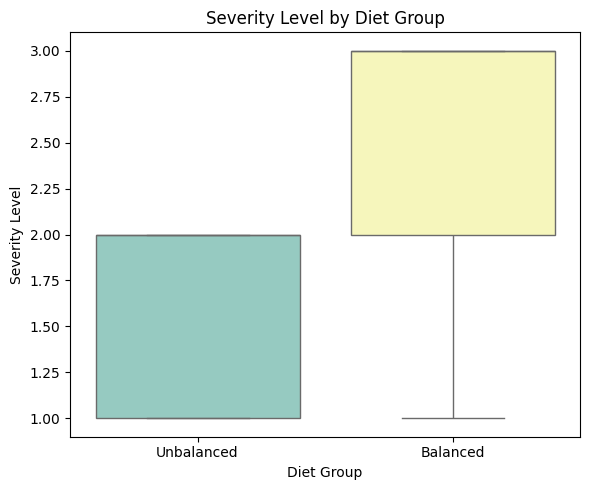

<ipython-input-32-bcff415c6ff1>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(alcohol_corr.keys()), y=list(alcohol_corr.values()), palette="Blues_d")



Correlation between Alcohol Use and each symptom:
Fatigue: 0.24
Weight Loss: 0.21
Shortness of Breath: 0.44
Wheezing: 0.18
Swallowing Difficulty: -0.11
Clubbing of Finger Nails: 0.41
Frequent Cold: 0.18
Dry Cough: 0.21
Snoring: 0.12


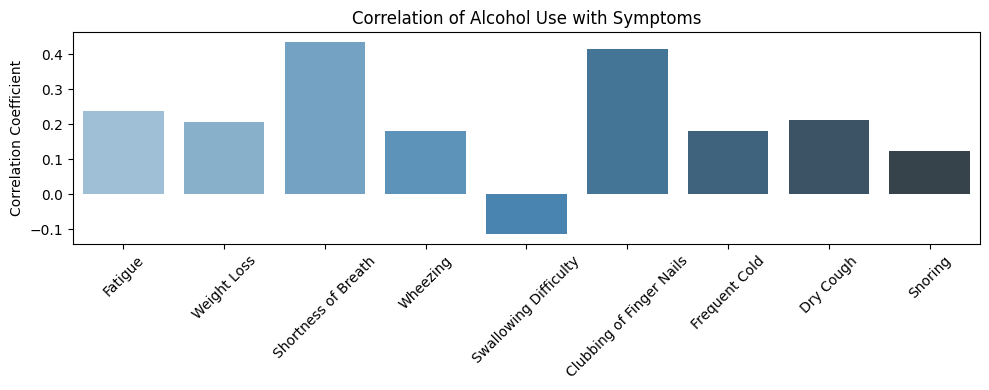


Probability of Weight Loss given Fatigue is present: 0.54


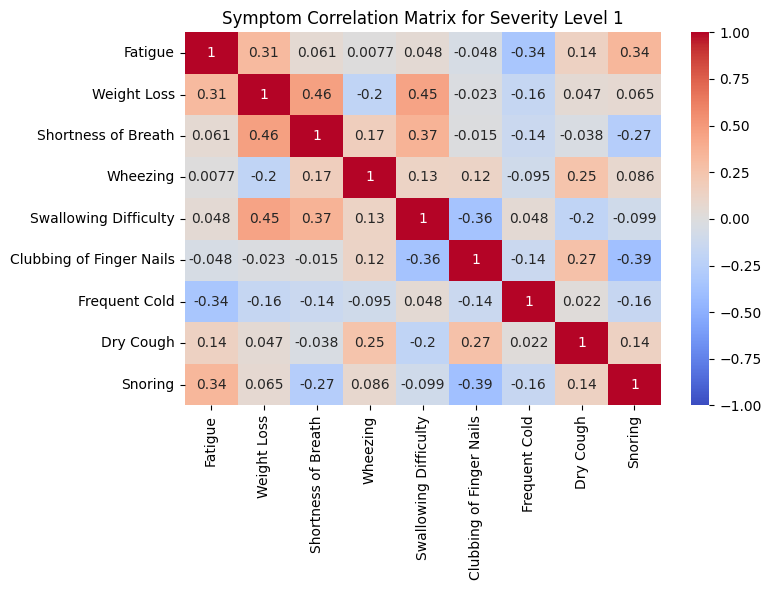

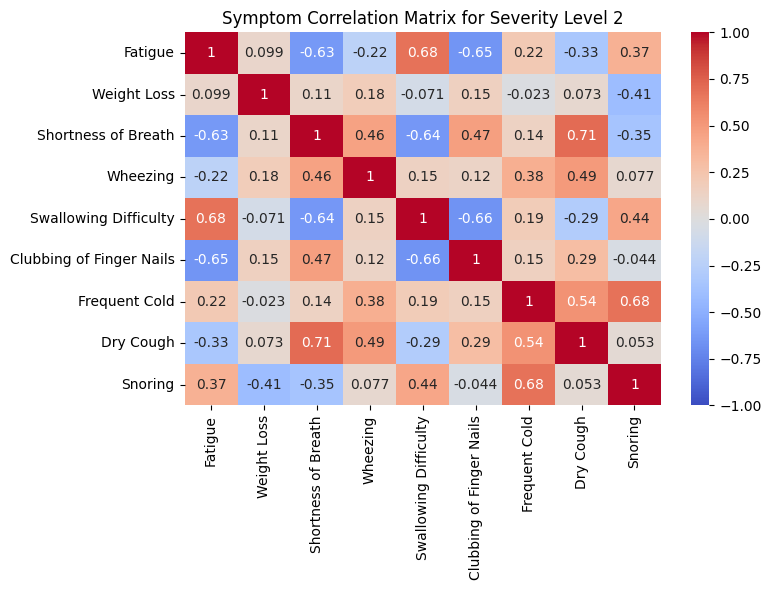

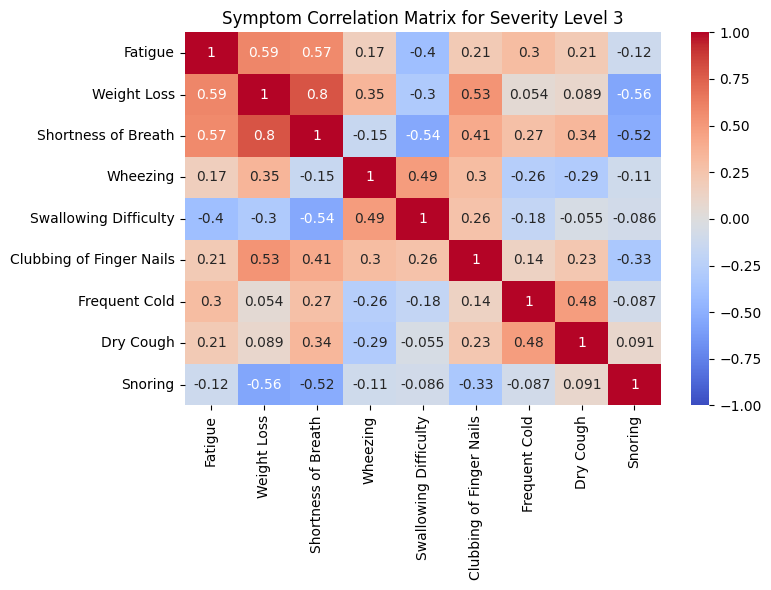


Symptom predictors for severe disease (sorted by absolute coefficient):
                    Symptom  Coefficient
0                   Fatigue     1.102755
4     Swallowing Difficulty     0.571672
2       Shortness of Breath     0.547334
1               Weight Loss    -0.440161
3                  Wheezing    -0.431037
8                   Snoring    -0.421897
5  Clubbing of Finger Nails     0.282380
7                 Dry Cough     0.209395
6             Frequent Cold    -0.043906

Classification Report for predicting severe disease (Level 3 cases):
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       181
           1       0.91      0.72      0.81       119

    accuracy                           0.86       300
   macro avg       0.88      0.84      0.85       300
weighted avg       0.87      0.86      0.86       300



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# -------------------------------
# Section 5: Lifestyle Influence
# -------------------------------

# 5.2 Diet impact on symptom severity
# For this analysis, we perform a median split on the 'Balanced Diet' score.
median_diet = df["Balanced Diet"].median()
df["Diet Group"] = np.where(df["Balanced Diet"] >= median_diet, "Balanced", "Unbalanced")

# Compare the overall severity level (Level) for each diet group.
diet_summary = df.groupby("Diet Group")["Level"].describe()
print("\nSeverity Level Summary by Diet Group:")
print(diet_summary)

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="Diet Group", y="Level", palette="Set3")
plt.title("Severity Level by Diet Group")
plt.xlabel("Diet Group")
plt.ylabel("Severity Level")
plt.tight_layout()
plt.show()

# 5.3 Alcohol use correlation with symptoms
# Define the list of symptom columns (adjust as needed)
symptom_cols = ["Fatigue", "Weight Loss", "Shortness of Breath", "Wheezing",
                "Swallowing Difficulty", "Clubbing of Finger Nails", "Frequent Cold",
                "Dry Cough", "Snoring"]

# Compute correlation between 'Alcohol use' and each symptom
alcohol_corr = {}
for symptom in symptom_cols:
    alcohol_corr[symptom] = df["Alcohol use"].corr(df[symptom])

print("\nCorrelation between Alcohol Use and each symptom:")
for symptom, corr in alcohol_corr.items():
    print(f"{symptom}: {corr:.2f}")

plt.figure(figsize=(10, 4))
sns.barplot(x=list(alcohol_corr.keys()), y=list(alcohol_corr.values()), palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Correlation of Alcohol Use with Symptoms")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


# -------------------------------
# Section 6: Advanced Symptom Correlation & Prediction
# -------------------------------

# 6.1 Probability of other symptoms appearing given a specific symptom
# Example: Given Fatigue is present, how likely is Weight Loss present?
# Here, we define a symptom as "present" if its score is >= 7 (adjust threshold as needed)
symptom_threshold = 7

# Create binary columns for fatigue and weight loss (1: present, 0: absent)
df["Fatigue_present"] = (df["Fatigue"] >= symptom_threshold).astype(int)
df["WeightLoss_present"] = (df["Weight Loss"] >= symptom_threshold).astype(int)

# Calculate conditional probability: P(Weight Loss present | Fatigue present)
if df["Fatigue_present"].sum() > 0:
    prob_weightloss_given_fatigue = df.loc[df["Fatigue_present"] == 1, "WeightLoss_present"].mean()
else:
    prob_weightloss_given_fatigue = np.nan
print(f"\nProbability of Weight Loss given Fatigue is present: {prob_weightloss_given_fatigue:.2f}")

# 6.2 Symptom correlation by severity level
# Compute and visualize the correlation matrix for symptom columns within each severity level
for level in sorted(df["Level"].unique()):
    df_level = df[df["Level"] == level]
    corr_matrix = df_level[symptom_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Symptom Correlation Matrix for Severity Level {level}")
    plt.tight_layout()
    plt.show()

# 6.3 Finding the best symptom predictors of severe disease (Level 3 cases)
# We create a binary target: 1 if Level==3 (severe), 0 otherwise.
df["Severe"] = (df["Level"] == 3).astype(int)

# Use symptom columns as predictors
X = df[symptom_cols]
y = df["Severe"]

# Split the dataset into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get coefficients of the model (symptom predictors)
coefficients = pd.DataFrame({
    "Symptom": symptom_cols,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("\nSymptom predictors for severe disease (sorted by absolute coefficient):")
print(coefficients)

# Evaluate the model performance
y_pred = model.predict(X_test)
print("\nClassification Report for predicting severe disease (Level 3 cases):")
print(classification_report(y_test, y_pred))

Average Risk Factors by Gender:
   Gender  Air Pollution  Genetic Risk  OccuPational Hazards
0       1       4.250836      4.968227              5.172241
1       2       3.228856      4.002488              4.345771


<Figure size 800x500 with 0 Axes>

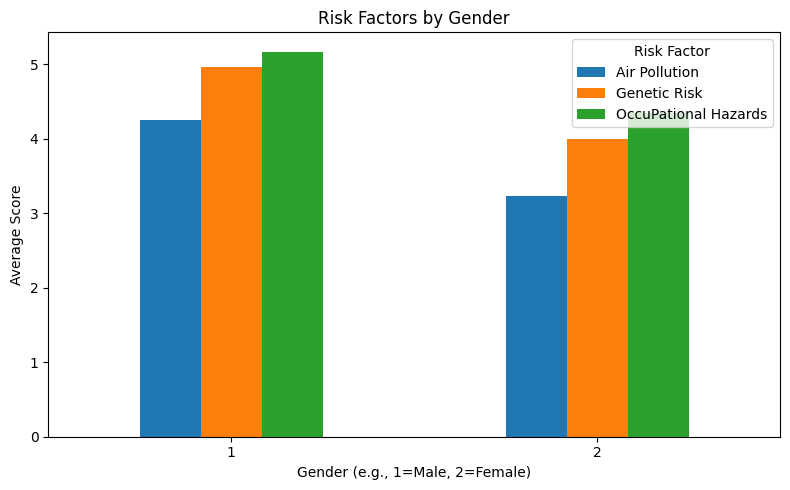

   Age Group  Level  Percentage
0       0-19      2   43.283582
1       0-19      1   28.358209
2       0-19      3   28.358209
3      20-39      3   38.175676
4      20-39      1   31.756757
5      20-39      2   30.067568
6      40-59      3   36.666667
7      40-59      2   35.185185
8      40-59      1   28.148148
9        60+      2   42.253521
10       60+      3   29.577465
11       60+      1   28.169014


<ipython-input-30-5bd6ad6ae567>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_severity_counts = df.groupby("Age Group")["Level"].value_counts(normalize=True).rename("Percentage").reset_index()


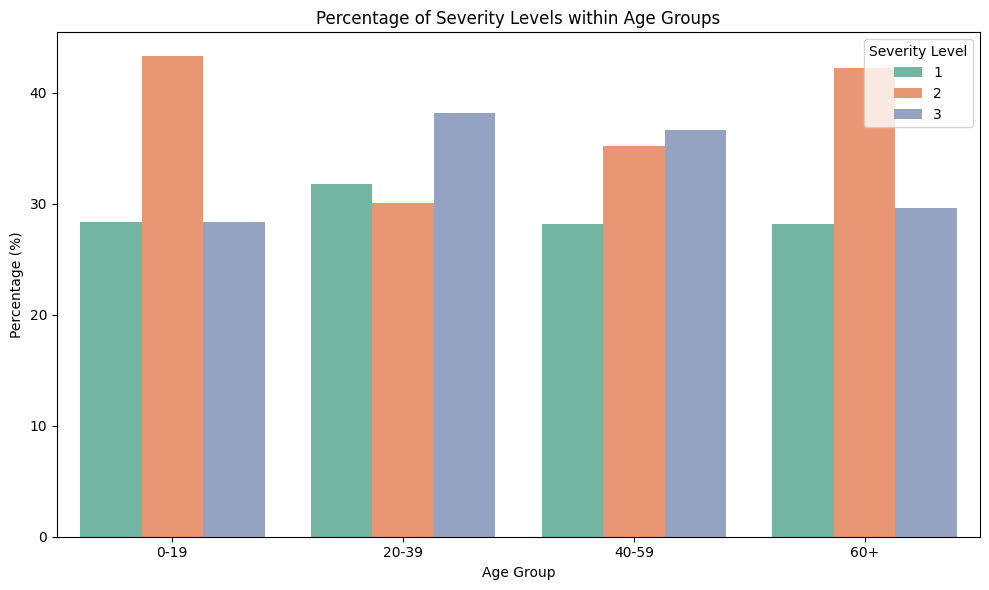

<ipython-input-30-5bd6ad6ae567>:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_symptoms = df.groupby("Age Group")[symptom_cols].mean().reset_index()


Average Symptom Scores by Age Group:
  Age Group   Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0      0-19  3.582090     3.477612             4.074627  3.955224   
1     20-39  3.836149     3.792230             4.250000  3.842905   
2     40-59  4.000000     4.018519             4.170370  3.722222   
3       60+  3.732394     4.112676             4.577465  3.267606   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0               3.701493                  3.686567       2.731343   3.029851   
1               3.829392                  3.891892       3.729730   3.954392   
2               4.103704                  3.851852       3.570370   4.044444   
3               1.732394                  4.676056       2.549296   3.056338   

    Snoring  
0  2.985075  
1  2.942568  
2  2.992593  
3  2.478873  


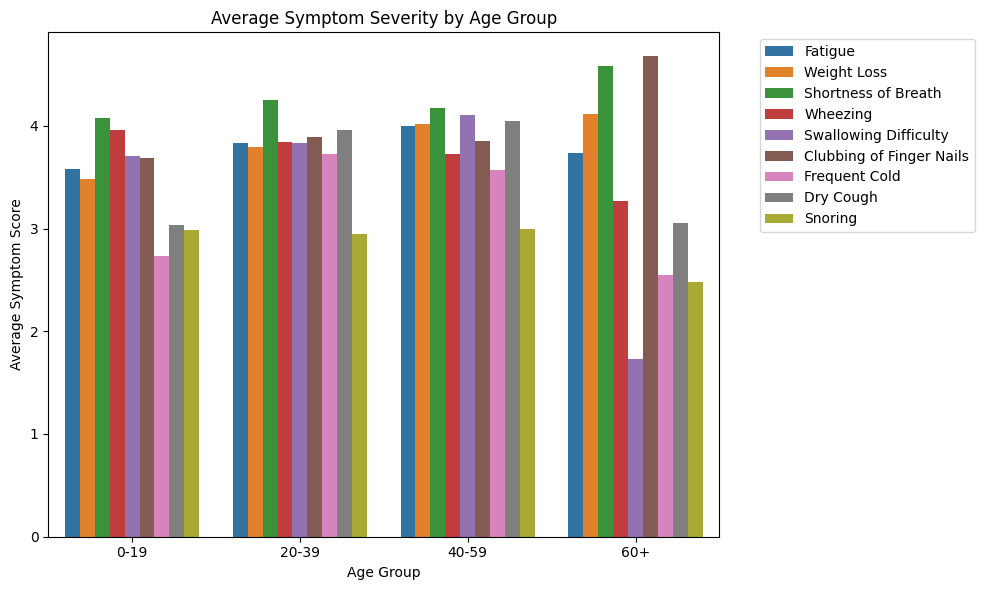

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

# =====================================================
# Section 7: Gender & Age-Based Risk Factor Analysis
# =====================================================

# 7.1: How different risk factors vary by gender
# We focus on these risk factors: Air Pollution, Genetic Risk, OccuPational Hazards
risk_factors = ["Air Pollution", "Genetic Risk", "OccuPational Hazards"]

# Calculate average risk factor values by Gender
risk_by_gender = df.groupby("Gender")[risk_factors].mean().reset_index()
print("Average Risk Factors by Gender:")
print(risk_by_gender)

plt.figure(figsize=(8, 5))
risk_by_gender.set_index("Gender").plot(kind="bar", figsize=(8,5))
plt.title("Risk Factors by Gender")
plt.xlabel("Gender (e.g., 1=Male, 2=Female)")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Risk Factor")
plt.tight_layout()
plt.show()

# 7.2: How age affects disease progression
# For this analysis, we'll examine how severity level (Level) and symptom scores vary across age groups.
# Create age groups (e.g., 0-19, 20-39, 40-59, 60+)
# Create Age Group column (0-19, 20-39, 40-59, 60+)
bins = [0, 19, 39, 59, 200]
age_labels = ["0-19", "20-39", "40-59", "60+"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=age_labels, right=True)

# Create frequency table with percentages
age_severity_counts = df.groupby("Age Group")["Level"].value_counts(normalize=True).rename("Percentage").reset_index()
age_severity_counts["Percentage"] = age_severity_counts["Percentage"] * 100

print(age_severity_counts)

# Plot the percentage of severity levels within each age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_severity_counts, x="Age Group", y="Percentage", hue="Level", palette="Set2")
plt.title("Percentage of Severity Levels within Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.legend(title="Severity Level")
plt.tight_layout()
plt.show()


# Define symptom columns as per your dataset structure
symptom_cols = ["Fatigue", "Weight Loss", "Shortness of Breath", "Wheezing",
                "Swallowing Difficulty", "Clubbing of Finger Nails", "Frequent Cold",
                "Dry Cough", "Snoring"]

# Ensure that the symptom columns are numeric
for col in symptom_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Group by Age Group and calculate the average for each symptom
age_symptoms = df.groupby("Age Group")[symptom_cols].mean().reset_index()
print("Average Symptom Scores by Age Group:")
print(age_symptoms)

# Melt the DataFrame for plotting with seaborn
age_symptoms_melted = age_symptoms.melt(id_vars="Age Group", var_name="Symptom", value_name="Avg Score")

# Plot average symptom scores by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_symptoms_melted, x="Age Group", y="Avg Score", hue="Symptom", palette="tab10")
plt.title("Average Symptom Severity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Symptom Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
